* Dataset Site : https://data.cityofnewyork.us/City-Government/Film-Permits/tg4x-b46p
* API Documentation : https://dev.socrata.com/foundry/data.cityofnewyork.us/tg4x-b46p
* Data Documentation : https://www.nyc.gov/site/mome/permits/when-permit-required.page

In [299]:
#!pip install sodapy

In [300]:
#Code taken from API Documentation
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofnewyork.us,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("tg4x-b46p", limit=40000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [301]:
results_df.head()

,eventid,eventtype,startdatetime,enddatetime,enteredon,eventagency,parkingheld,borough,communityboard_s,policeprecinct_s,category,subcategoryname,country,zipcode_s
0,671939,Shooting Permit,2022-09-09T07:00:00.000,2022-09-09T20:00:00.000,2022-09-08T10:30:49.000,"Mayor's Office of Film, Theatre & Broadcasting",CHARLES STREET between GREENWICH STREET and HU...,Manhattan,"2, 4","10, 6",Commercial,Commercial,United States of America,10014
1,671881,Shooting Permit,2022-09-09T07:00:00.000,2022-09-09T21:00:00.000,2022-09-07T17:43:38.000,"Mayor's Office of Film, Theatre & Broadcasting","11 STREET between 44 DRIVE and 44 ROAD, 44 DR...",Queens,"1, 2","108, 114",Television,Cable-episodic,United States of America,"11101, 11106"
2,671842,Shooting Permit,2022-09-08T06:00:00.000,2022-09-08T20:00:00.000,2022-09-07T15:07:03.000,"Mayor's Office of Film, Theatre & Broadcasting",WEST 14 STREET between WASHINGTON STREET and...,Manhattan,"2, 4","10, 6",Commercial,Commercial,United States of America,"10011, 10014"
3,671822,Shooting Permit,2022-09-09T07:00:00.000,2022-09-09T21:00:00.000,2022-09-07T14:28:42.000,"Mayor's Office of Film, Theatre & Broadcasting",KINGSLAND AVENUE between GREENPOINT AVENUE and...,Brooklyn,1,94,Television,Episodic series,United States of America,11222
4,671808,Shooting Permit,2022-09-09T13:00:00.000,2022-09-10T04:00:00.000,2022-09-07T13:56:58.000,"Mayor's Office of Film, Theatre & Broadcasting",JOHNSON AVENUE between GARDNER AVENUE and STEW...,Brooklyn,"1, 5","104, 90",Television,Cable-episodic,United States of America,"11237, 11385"


In [302]:
results_df.isnull().sum()

eventid             0
eventtype           0
startdatetime       0
enddatetime         0
enteredon           0
eventagency         0
parkingheld         0
borough             0
communityboard_s    0
policeprecinct_s    0
category            0
subcategoryname     0
country             0
zipcode_s           0
dtype: int64

In [303]:
results_df.eventtype.unique()

array(['Shooting Permit', 'Rigging Permit', 'DCAS Prep/Shoot/Wrap Permit',
       'Theater Load in and Load Outs'], dtype=object)

In [304]:
results_df.describe()

,eventid,eventtype,startdatetime,enddatetime,enteredon,eventagency,parkingheld,borough,communityboard_s,policeprecinct_s,category,subcategoryname,country,zipcode_s
count,11267,11267,11267,11267,11267,11267,11267,11267,11267,11267,11267,11267,11267,11267
unique,11267,4,4404,5340,11110,1,6743,5,342,781,9,27,3,1384
top,560275,Shooting Permit,2021-11-01T07:00:00.000,2021-07-27T22:00:00.000,2021-10-08T13:24:11.000,"Mayor's Office of Film, Theatre & Broadcasting",EAST 11 STREET between 3 AVENUE and 4 AVENUE...,Manhattan,1,94,Television,Episodic series,United States of America,11222
freq,1,10046,16,12,5,11267,180,4615,3023,1728,7188,5022,11251,1600


In [305]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11267 entries, 0 to 11266
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   eventid           11267 non-null  object
 1   eventtype         11267 non-null  object
 2   startdatetime     11267 non-null  object
 3   enddatetime       11267 non-null  object
 4   enteredon         11267 non-null  object
 5   eventagency       11267 non-null  object
 6   parkingheld       11267 non-null  object
 7   borough           11267 non-null  object
 8   communityboard_s  11267 non-null  object
 9   policeprecinct_s  11267 non-null  object
 10  category          11267 non-null  object
 11  subcategoryname   11267 non-null  object
 12  country           11267 non-null  object
 13  zipcode_s         11267 non-null  object
dtypes: object(14)
memory usage: 1.2+ MB


From the above information, we can clearly see that the date is taken as string that the datetime data type and hence below I'll be typecasting it into desired format.

In [306]:
import datetime
from datetime import datetime

In [307]:
results_df['enddatetime']=pd.to_datetime(
                                  results_df['enddatetime'],
                                 format='%Y/%m/%d %H:%M:%S')

In [308]:
results_df['startdatetime']=pd.to_datetime(
                                  results_df['startdatetime'],
                                 format='%Y/%m/%d %H:%M:%S')

In [309]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11267 entries, 0 to 11266
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   eventid           11267 non-null  object        
 1   eventtype         11267 non-null  object        
 2   startdatetime     11267 non-null  datetime64[ns]
 3   enddatetime       11267 non-null  datetime64[ns]
 4   enteredon         11267 non-null  object        
 5   eventagency       11267 non-null  object        
 6   parkingheld       11267 non-null  object        
 7   borough           11267 non-null  object        
 8   communityboard_s  11267 non-null  object        
 9   policeprecinct_s  11267 non-null  object        
 10  category          11267 non-null  object        
 11  subcategoryname   11267 non-null  object        
 12  country           11267 non-null  object        
 13  zipcode_s         11267 non-null  object        
dtypes: datetime64[ns](2), 

In [310]:
results_df['end_year'] = results_df['enddatetime'].dt.year

In [311]:
results_df['end_year'].unique()

array([2022, 2021])

In [312]:
results_df['start_year'] = results_df['startdatetime'].dt.year

In [313]:
results_df['start_year'].unique()

array([2022, 2021])

There was start time and end time but no duration which going ahead could be a useful metric and hence I am creting it below.

In [314]:
import numpy as np

In [315]:
results_df['difference_day'] = pd.DataFrame((results_df['enddatetime']-results_df['startdatetime']).values/np.timedelta64(1,'D'), columns=['difference_day']).round(2)

In [316]:
results_df.head()

,eventid,eventtype,startdatetime,enddatetime,enteredon,eventagency,parkingheld,borough,communityboard_s,policeprecinct_s,category,subcategoryname,country,zipcode_s,end_year,start_year,difference_day
0,671939,Shooting Permit,2022-09-09 07:00:00,2022-09-09 20:00:00,2022-09-08T10:30:49.000,"Mayor's Office of Film, Theatre & Broadcasting",CHARLES STREET between GREENWICH STREET and HU...,Manhattan,"2, 4","10, 6",Commercial,Commercial,United States of America,10014,2022,2022,0.54
1,671881,Shooting Permit,2022-09-09 07:00:00,2022-09-09 21:00:00,2022-09-07T17:43:38.000,"Mayor's Office of Film, Theatre & Broadcasting","11 STREET between 44 DRIVE and 44 ROAD, 44 DR...",Queens,"1, 2","108, 114",Television,Cable-episodic,United States of America,"11101, 11106",2022,2022,0.58
2,671842,Shooting Permit,2022-09-08 06:00:00,2022-09-08 20:00:00,2022-09-07T15:07:03.000,"Mayor's Office of Film, Theatre & Broadcasting",WEST 14 STREET between WASHINGTON STREET and...,Manhattan,"2, 4","10, 6",Commercial,Commercial,United States of America,"10011, 10014",2022,2022,0.58
3,671822,Shooting Permit,2022-09-09 07:00:00,2022-09-09 21:00:00,2022-09-07T14:28:42.000,"Mayor's Office of Film, Theatre & Broadcasting",KINGSLAND AVENUE between GREENPOINT AVENUE and...,Brooklyn,1,94,Television,Episodic series,United States of America,11222,2022,2022,0.58
4,671808,Shooting Permit,2022-09-09 13:00:00,2022-09-10 04:00:00,2022-09-07T13:56:58.000,"Mayor's Office of Film, Theatre & Broadcasting",JOHNSON AVENUE between GARDNER AVENUE and STEW...,Brooklyn,"1, 5","104, 90",Television,Cable-episodic,United States of America,"11237, 11385",2022,2022,0.62


In [317]:
results_df['category'].value_counts()

Television           7188
Film                 1145
Theater              1070
Commercial            807
Still Photography     499
WEB                   423
Documentary            68
Student                37
Music Video            30
Name: category, dtype: int64

In [318]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

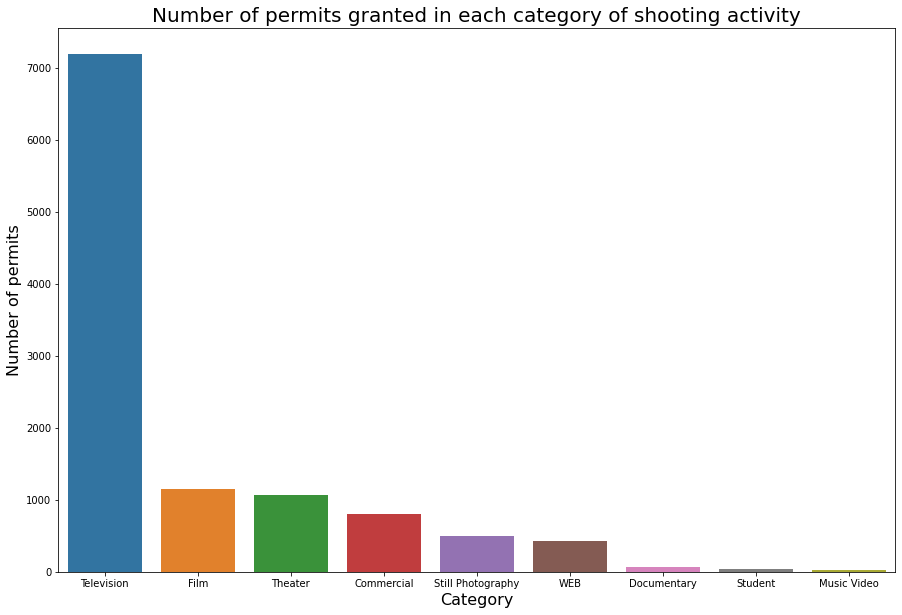

In [319]:
plt.figure(figsize=(15,10))
sns.countplot(x='category',data=results_df,order=results_df['category'].value_counts().index)
plt.title("Number of permits granted in each category of shooting activity",fontsize=20)
plt.xlabel("Category",fontsize=16)
plt.ylabel("Number of permits",fontsize=16)
plt.show()

In [320]:
results_df['eventtype'].value_counts()

Shooting Permit                  10046
Theater Load in and Load Outs     1038
Rigging Permit                     118
DCAS Prep/Shoot/Wrap Permit         65
Name: eventtype, dtype: int64

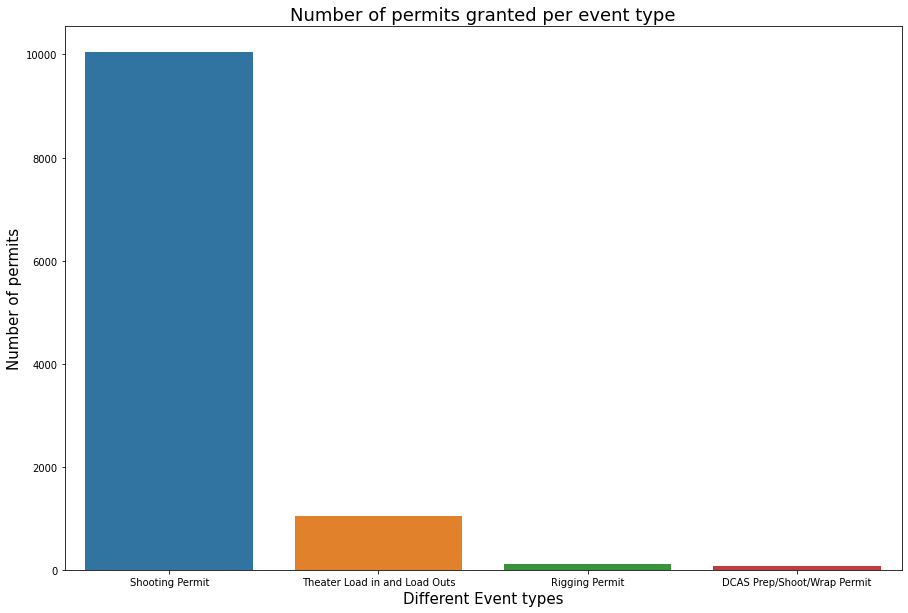

In [321]:
plt.figure(figsize=(15,10))
sns.countplot(x='eventtype',data=results_df,order=results_df['eventtype'].value_counts().index)
plt.title("Number of permits granted per event type",fontsize=18)
plt.xlabel("Different Event types",fontsize=15)
plt.ylabel("Number of permits",fontsize=15)
plt.show()

In [322]:
results_df['borough'].value_counts()

Manhattan        4615
Brooklyn         4040
Queens           2052
Bronx             460
Staten Island     100
Name: borough, dtype: int64

In [323]:
results_df['country'].value_counts()

United States of America    11251
United Kingdom                 12
Canada                          4
Name: country, dtype: int64

In [324]:
print("Data index for missing ZipCode(s)",list(results_df[results_df['zipcode_s'].isnull()].index))

Data index for missing ZipCode(s) []


Below I wanted to try to lot a very interactive graph using the location parameters which were available to me and hence I took a piece of code from online and wanted to switch arguements as per my data but I realized that I need Latitude and Longitude to plot the graph and hence the code has been commented out.

In [325]:
#!pip install geopandas

In [326]:
#!pip install --upgrade pip setuptools wheel

In [327]:
#conda install -c conda-forge cartopy

In [328]:
#!pip install geoplot

In [329]:
# import geopandas
# import geoplot
# import pandas as pd
# from shapely.geometry import Point, Polygon

In [330]:
#cols_to_keep=['store_longitude','store_latitude']

# crs={'init':'epsg:4326'}

# boroughs = geopandas.read_file(geoplot.datasets.get_path('nyc_boroughs'))

# geo_df=geopandas.GeoDataFrame(store_locDF,crs=crs,geometry=geopandas.points_from_xy(store_locDF["store_longitude"], store_locDF["store_latitude"]))



# fig,ax=plt.subplots(figsize=(15,15))
# boroughs.plot(ax=ax,alpha=0.4,color="grey")
# geo_df[geo_df['active_yn']=="Y"].plot(ax=ax,markersize=200, alpha=0.4,color="green", label="Active Store")
# geo_df[geo_df['active_yn']=="N"].plot(ax=ax,markersize=200, alpha=0.4,color="red", label="Inactive Stores")
# plt.legend()

In [331]:
results_df['eventagency'].value_counts()

Mayor's Office of Film, Theatre & Broadcasting    11267
Name: eventagency, dtype: int64

In [332]:
results_df['end_month'] = results_df['enddatetime'].dt.month

In [333]:
results_df

,eventid,eventtype,startdatetime,enddatetime,enteredon,eventagency,parkingheld,borough,communityboard_s,policeprecinct_s,category,subcategoryname,country,zipcode_s,end_year,start_year,difference_day,end_month
0,671939,Shooting Permit,2022-09-09 07:00:00,2022-09-09 20:00:00,2022-09-08T10:30:49.000,"Mayor's Office of Film, Theatre & Broadcasting",CHARLES STREET between GREENWICH STREET and HU...,Manhattan,"2, 4","10, 6",Commercial,Commercial,United States of America,10014,2022,2022,0.54,9
1,671881,Shooting Permit,2022-09-09 07:00:00,2022-09-09 21:00:00,2022-09-07T17:43:38.000,"Mayor's Office of Film, Theatre & Broadcasting","11 STREET between 44 DRIVE and 44 ROAD, 44 DR...",Queens,"1, 2","108, 114",Television,Cable-episodic,United States of America,"11101, 11106",2022,2022,0.58,9
2,671842,Shooting Permit,2022-09-08 06:00:00,2022-09-08 20:00:00,2022-09-07T15:07:03.000,"Mayor's Office of Film, Theatre & Broadcasting",WEST 14 STREET between WASHINGTON STREET and...,Manhattan,"2, 4","10, 6",Commercial,Commercial,United States of America,"10011, 10014",2022,2022,0.58,9
3,671822,Shooting Permit,2022-09-09 07:00:00,2022-09-09 21:00:00,2022-09-07T14:28:42.000,"Mayor's Office of Film, Theatre & Broadcasting",KINGSLAND AVENUE between GREENPOINT AVENUE and...,Brooklyn,1,94,Television,Episodic series,United States of America,11222,2022,2022,0.58,9
4,671808,Shooting Permit,2022-09-09 13:00:00,2022-09-10 04:00:00,2022-09-07T13:56:58.000,"Mayor's Office of Film, Theatre & Broadcasting",JOHNSON AVENUE between GARDNER AVENUE and STEW...,Brooklyn,"1, 5","104, 90",Television,Cable-episodic,United States of America,"11237, 11385",2022,2022,0.62,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11262,555217,Shooting Permit,2021-01-13 06:00:00,2021-01-13 22:00:00,2020-12-14T14:00:13.000,"Mayor's Office of Film, Theatre & Broadcasting",EAST 139 STREET between WALNUT AVENUE and LOC...,Bronx,1,40,Television,Episodic series,United States of America,10454,2021,2021,0.67,1
11263,555215,Shooting Permit,2021-01-12 06:00:00,2021-01-12 22:00:00,2020-12-14T13:52:53.000,"Mayor's Office of Film, Theatre & Broadcasting",EAST 139 STREET between WALNUT AVENUE and LOC...,Bronx,1,40,Television,Episodic series,United States of America,10454,2021,2021,0.67,1
11264,555213,Shooting Permit,2021-01-11 06:00:00,2021-01-11 21:00:00,2020-12-14T13:47:24.000,"Mayor's Office of Film, Theatre & Broadcasting",EAST 139 STREET between WALNUT AVENUE and LOC...,Bronx,1,40,Television,Episodic series,United States of America,10454,2021,2021,0.62,1
11265,555055,Shooting Permit,2021-01-13 10:30:00,2021-01-14 00:30:00,2020-12-11T17:13:14.000,"Mayor's Office of Film, Theatre & Broadcasting",HOLLIS CT BOULEVARD between 58 AVENUE and FRAN...,Queens,"11, 8","107, 111",Television,Episodic series,United States of America,"11364, 11365, 11366, 11427",2021,2021,0.58,1


<AxesSubplot: xlabel='end_month', ylabel='eventtype'>

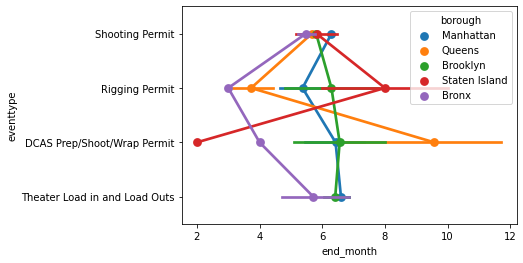

In [334]:
sns.pointplot(data=results_df,x='end_month', y='eventtype', hue="borough")

<AxesSubplot: xlabel='category', ylabel='end_year'>

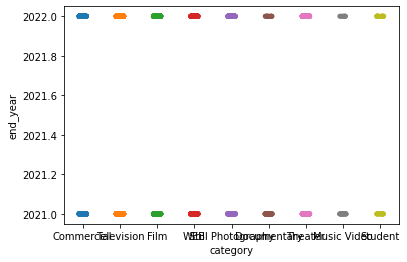

In [335]:
sns.stripplot(data=results_df, x = 'category', y = 'end_year')

In [336]:
results_df['start_month'] = results_df['startdatetime'].dt.month

In [337]:
top_category_df = results_df[(results_df['category']=='Television')|(results_df['category']=='Film')
                                |(results_df['category']=='Theater')|(results_df['category']=='Commercial')
                                |(results_df['category']=='Still Photography')]

In [338]:
top_category_df

,eventid,eventtype,startdatetime,enddatetime,enteredon,eventagency,parkingheld,borough,communityboard_s,policeprecinct_s,category,subcategoryname,country,zipcode_s,end_year,start_year,difference_day,end_month,start_month
0,671939,Shooting Permit,2022-09-09 07:00:00,2022-09-09 20:00:00,2022-09-08T10:30:49.000,"Mayor's Office of Film, Theatre & Broadcasting",CHARLES STREET between GREENWICH STREET and HU...,Manhattan,"2, 4","10, 6",Commercial,Commercial,United States of America,10014,2022,2022,0.54,9,9
1,671881,Shooting Permit,2022-09-09 07:00:00,2022-09-09 21:00:00,2022-09-07T17:43:38.000,"Mayor's Office of Film, Theatre & Broadcasting","11 STREET between 44 DRIVE and 44 ROAD, 44 DR...",Queens,"1, 2","108, 114",Television,Cable-episodic,United States of America,"11101, 11106",2022,2022,0.58,9,9
2,671842,Shooting Permit,2022-09-08 06:00:00,2022-09-08 20:00:00,2022-09-07T15:07:03.000,"Mayor's Office of Film, Theatre & Broadcasting",WEST 14 STREET between WASHINGTON STREET and...,Manhattan,"2, 4","10, 6",Commercial,Commercial,United States of America,"10011, 10014",2022,2022,0.58,9,9
3,671822,Shooting Permit,2022-09-09 07:00:00,2022-09-09 21:00:00,2022-09-07T14:28:42.000,"Mayor's Office of Film, Theatre & Broadcasting",KINGSLAND AVENUE between GREENPOINT AVENUE and...,Brooklyn,1,94,Television,Episodic series,United States of America,11222,2022,2022,0.58,9,9
4,671808,Shooting Permit,2022-09-09 13:00:00,2022-09-10 04:00:00,2022-09-07T13:56:58.000,"Mayor's Office of Film, Theatre & Broadcasting",JOHNSON AVENUE between GARDNER AVENUE and STEW...,Brooklyn,"1, 5","104, 90",Television,Cable-episodic,United States of America,"11237, 11385",2022,2022,0.62,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11262,555217,Shooting Permit,2021-01-13 06:00:00,2021-01-13 22:00:00,2020-12-14T14:00:13.000,"Mayor's Office of Film, Theatre & Broadcasting",EAST 139 STREET between WALNUT AVENUE and LOC...,Bronx,1,40,Television,Episodic series,United States of America,10454,2021,2021,0.67,1,1
11263,555215,Shooting Permit,2021-01-12 06:00:00,2021-01-12 22:00:00,2020-12-14T13:52:53.000,"Mayor's Office of Film, Theatre & Broadcasting",EAST 139 STREET between WALNUT AVENUE and LOC...,Bronx,1,40,Television,Episodic series,United States of America,10454,2021,2021,0.67,1,1
11264,555213,Shooting Permit,2021-01-11 06:00:00,2021-01-11 21:00:00,2020-12-14T13:47:24.000,"Mayor's Office of Film, Theatre & Broadcasting",EAST 139 STREET between WALNUT AVENUE and LOC...,Bronx,1,40,Television,Episodic series,United States of America,10454,2021,2021,0.62,1,1
11265,555055,Shooting Permit,2021-01-13 10:30:00,2021-01-14 00:30:00,2020-12-11T17:13:14.000,"Mayor's Office of Film, Theatre & Broadcasting",HOLLIS CT BOULEVARD between 58 AVENUE and FRAN...,Queens,"11, 8","107, 111",Television,Episodic series,United States of America,"11364, 11365, 11366, 11427",2021,2021,0.58,1,1


In [339]:
top_category_pivot_df=top_category_df.pivot_table(values='eventid', index ='start_month', columns='start_year', aggfunc=np.size)

In [340]:
top_category_pivot_df

start_year,2021,2022
start_month,,
1,336.0,421.0
2,387.0,542.0
3,571.0,662.0
4,502.0,623.0
5,432.0,591.0
6,349.0,665.0
7,335.0,577.0
8,624.0,617.0
9,572.0,166.0


In [341]:
# df = top_category_df.groupby(['start_month','category',])['eventid'].count().unstack().plot(marker='o',figsize=(15,10))
df = top_category_df.groupby(['start_month','category',])['eventid'].count().unstack()
df

category,Commercial,Film,Still Photography,Television,Theater
start_month,,,,,
1,54,33,10,616,44
2,51,36,15,745,82
3,59,38,18,1013,105
4,76,88,48,796,117
5,85,143,80,593,122
6,121,119,110,557,107
7,67,151,54,594,46
8,95,213,59,793,81
9,68,100,32,443,95
